## Esercizio 09.1

Ho impostato il problema del TSP nel seguente modo:

Le citta sono 32 disposte nel primo caso casualmente su una circonferenza nel secondo all'interno di un quadrato.

ho scelto come parametro da minimizzare a distanza euclida classica:

$$
L^{(2)}(\vec{x}_1,\vec{x}_2,\dots,\vec{x}_N)=\sum_1^N|{\vec{x}_i-\vec{x}_{i+1}}|^2
$$


ad ogni citta ho associato un numero intero nell'intervallo $[1,32]$ e qundi ogni possibile percorso è rappresentato da un vettore 1D.




### Procedimento


1. Per prima cosa è stato necessario creare la prima popolazione, ovvero i primi n individui (possibili percorsi). Per fare questo ho scritto una funzione che partendo dalle posizioni iniziali delle città creasse un individuo facendo un unica permutazione tra una coppia di città. La permutazione è effettuata rispettando i limiti del TSP.

2. Creato l'individuo, questo viene controllato da una funzione check che verifica se l'individuo rispetta effettivamente i limiti del problema e poi viene aggiunto alla popolazione.

3. Dopo la popolazione iniziale, prima di implemetare il crossover ho scritto le mutazioni, ovvero le funzioni di permutazione da applicare ad ogni individuo con una certa probabilità:
- Permutazioni di coppie di città, quella che ho già utilizzato per la prima popolazione.
- Shift di n posizioni di m citta contigue.
- Permutazioni di m citta contigue con altre (tutte diverse) m città contigue.
- Inversione dell' ordine delle posizioni di m città contigue.

    Implementate le permutazioni ho verificato che ognuna funzionasse correttamente, che gli individui permutati rispettassero i limiti del TSP e poi ho controllato se effettivamente l' insieme di tutte le permutazioni (ho utilizzato per ciascuna una probabilità del $20\%$) eseguisse una ricerca randomica dei possibili percorsi.

4. Ho infine scritto la funzione di crossover che per prima cosa necessita di una funzione di selezione dei parenti. I parenti devono essere selezionati con una probabilità crescente con il fitness. 
    
    Il fitness l'ho definito nel seguente modo: $$f_i=1 - \frac{L^{(2)}_i}{\sum_{i=1}^n L^{(2)}_i} $$ dove f è il fitness dell'individuo i-esimo e n è il numero di indvidui che compongono la popolazione. Quindi l'individuo che ha fitness maggiore è quello che ha effettivamete una lunghezza $L^{(2)}$ minore. Ho ordinato la popolazione in ordine decrescente di fitness e quindi ho selezionato i parenti con il seguente algoritmo: $j= (int) [n \times (r^p)] $ dove j è l'indice dell'individuo, r è un numero random $(0,1)$ e p è un esponente che modula la probabilità di scegliere elementi con un basso j o alto j, quindi con un alto o basso fitness avendo ordinato la popolazione. La scelta di p è fondamentale per velocizzare la convergenza del GA. 
    
    Implementata la funzione di selezione, il crossover si sviluppa nel seguente modo:
    - I genitori selezionati vengono troncati in modo casuale nello stesso punto.
    - L'ordine delle città che ogni genitore ha dal troncamento in poi viene sostituito dall'ordine che quelle stesse città hanno nell'altro genitore. 
    - I due nuovi individui così creati sono i figli, che possono essere aggiunti alla nuova popolazione.
    - Se il crossover non avviene i genitori vengono semplicemente copiati dalla vecchia alla nuova popolazione.

  

### Scelta dei parametri
I parametri da scegliere sono l'esponente p dell'algoritmo di selezione dei parenti, le probabilità di mutazione $p_m$, quella di crossover $p_c$, le dimensioni delle popolazioni e il numero di generazioni. Sono quantità molto correlate tra di loro e la convergenza dell'algoritmo genetico dipende molto da questi parametri.

1. Per quanto riguarda l'esponente $p$ se $p \rightarrow 0$ la selezione sugli individui della popolazione è fatta in modo totalmente randomico e quindi il GA non convergerà mai, se invece $p \rightarrow \infty$ le nuove popolazioni generate saranno fatte di figli provenienti sempre dagli stessi genitori (parenti troppo stretti). In questo caso il rischio è quello di finire in un minimo locale e non assoluto. Ho scelto $p=1.7$ che corrisponde al valore per il quale circa il $50\%$ degli indici j generati per la scelta dei parenti appartiene ai primi 300 valori avendo fissato popolazioni di 1000 individui. L'istrogramma sotto mostra la distribuzione di $10^6$ indici.



percentuale:  49 %


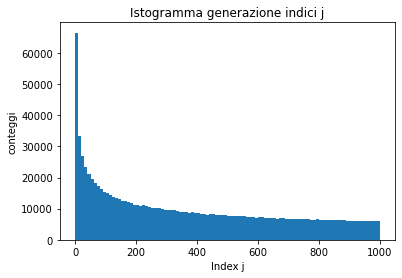

In [1]:
import numpy as np
import matplotlib.pyplot as plt


with open("Indici.0") as Ind:
	I=np.loadtxt(Ind,usecols=(0),dtype=float)

c=0
for i in range(0,I.size):
	if(I[i]<=300):
		c+=1;
PC=int(c/I.size*100)
print("percentuale: ",PC,"%")
bins=plt.hist(I,bins=100)
plt.title("Istogramma generazione indici j")
plt.xlabel("Index j")
plt.ylabel("conteggi")

plt.show()

2. Le probabilità di mutazione sono fondamentali perchè conferiscono al GA quella parte randomica che evita all'algoritmo di evolvere verso un minimo locale, che non è il risultato reale. Questo accade con la sola presenza di crossover. Quindi probabilità di mutazione troppo basse rischiano di non portare ad un risultato esatto, per la presenza di minimi locali, mentre probabilità troppo alte non fanno convergere l'algoritmo. Per questo motivo ho fissato le probabilità di ciascuna mutazione a $p_m=8\%$


3. Il crossover è il processo che fa si che le nuove popolazioni siano migliori di quelle vecchie. Quindi un rate di crossover troppo basso non fa evolvere l'algoritmo, mentre una probabilità troppo alta conduce velocemente ad una convergenza che però potrebbe non essere quella desiderata. Inoltre il crossover deve avvenire molte più volte rispetto alle mutazioni altrimenti le popolazioni evolvono troppo lentamente per questi motivi ho fissato $p_c=60\%$


4. La scelta della dimensione della popolazione è un altro parametro molto importante: se la popolazione è troppo piccola la ricerca del miglior percorso viene fatta in un campione ristretto e anche in questo caso il rischio di finire in un minimo locale aumenta. Se la popolazione è troppo grande il carico computazionale diventa troppo importante. Quindi la taglia della popolazione deve essere ragionevole, dopo diverse prove, ho scelto una popolazione di 1000 individui e ho eseguito 1000 generazioni.


### Risultati
Ricapitolando ho scelto popolazioni di 1000 individui e ho effettuato 1000 generazioni in entrambi i due casi:
1. 32 città distribuite casualmente su una circonferenza
2. 32 città distribuite casualmente all'interno di un quadrato

Di seguito riporto due figure, per ogni configurazione di città, che mostrano i valori di $L^{(2)}$ e di $ \langle L^{(2)} \rangle $ mediato nella prima metà (nel mio caso quella buona) della popolazione, al variare delle generazioni.

Lunghezza percorso finale circonferenza:  6.2413
Lunghezza percorso finale quadrato:  9.90334


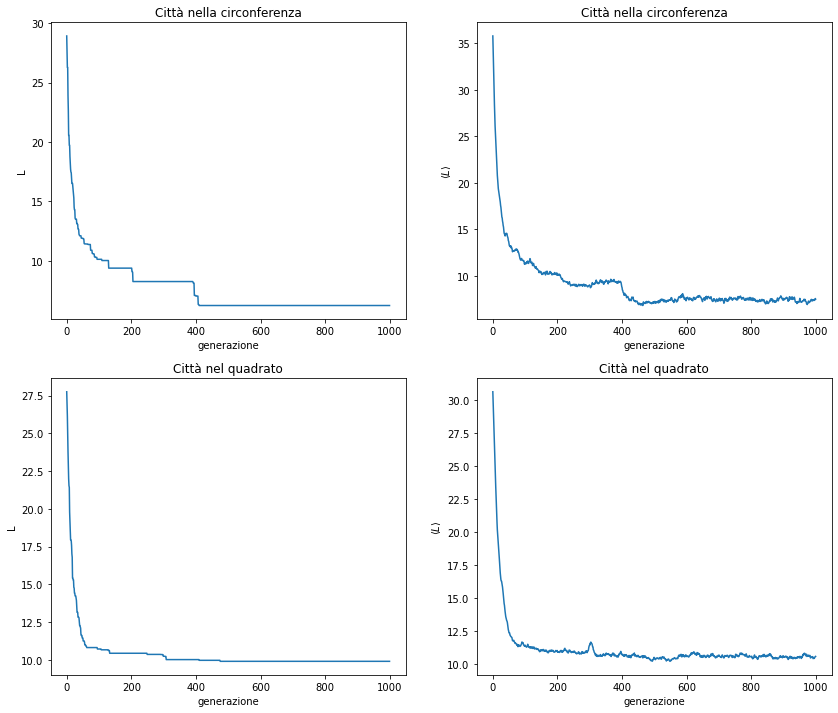

In [4]:
import numpy as np
import matplotlib.pyplot as plt


with open("LCirc.dat") as Length:
	L=np.loadtxt(Length,dtype=float)

with open("LCirc_medio.dat") as LengthAve:
	LAve=np.loadtxt(LengthAve,usecols=(0),dtype=float)

with open("LSquare.dat") as LengthS:
	LS=np.loadtxt(LengthS,dtype=float)

with open("LSquare_medio.dat") as LengthSAve:
	LSAve=np.loadtxt(LengthSAve,usecols=(0),dtype=float)

x=np.arange(L[:,0].size)
xAve=np.arange(LAve.size)

xS=np.arange(LS[:,0].size)
xSAve=np.arange(LSAve.size)



print("Lunghezza percorso finale circonferenza: ",L[L[:,0].size-1,0])
print("Lunghezza percorso finale quadrato: ",LS[LS[:,0].size-1,0])



fig=plt.figure(figsize=(14,12))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.set_title("Città nella circonferenza")
ax2.set_title("Città nella circonferenza")
ax3.set_title("Città nel quadrato")
ax4.set_title("Città nel quadrato")


ax1.set_xlabel("generazione")
ax2.set_xlabel("generazione")
ax3.set_xlabel("generazione")
ax4.set_xlabel("generazione")


ax1.set_ylabel("L")
ax3.set_ylabel("L")
ax2.set_ylabel(r"$ \langle L \rangle $")
ax4.set_ylabel(r"$ \langle L \rangle $")


ax1.plot(x,L[:,0])
ax2.plot(xAve,LAve)
ax3.plot(xS,LS[:,0])
ax4.plot(xSAve,LSAve)
plt.show()
    


Infine riporto una figura del miglior percorso in entrambi i casi

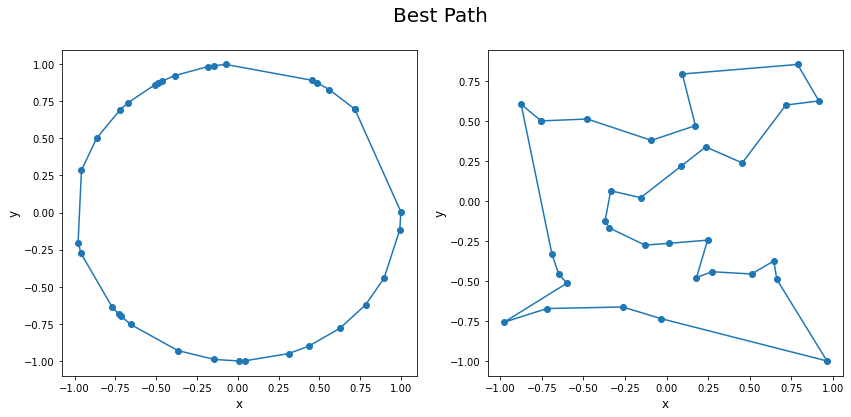

In [2]:
import numpy as np
import matplotlib.pyplot

with open("MigliorPercorsoCirc.dat") as BestPath:
	BP=np.loadtxt(BestPath,usecols=(0,1,2),dtype=float)

with open("MigliorPercorsoSquare.dat") as BestPathS:
	BPS=np.loadtxt(BestPathS,usecols=(0,1,2),dtype=float)
    
    
fig=plt.figure(figsize=(14,6))
fig.suptitle("Best Path", fontsize=20)
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.plot(BP[:,0],BP[:,1])
ax1.scatter(BP[:,0],BP[:,1])

ax2.plot(BPS[:,0],BPS[:,1])
ax2.scatter(BPS[:,0],BPS[:,1])

ax1.set_xlabel("x",fontsize=12)
ax2.set_xlabel("x",fontsize=12)

ax1.set_ylabel("y",fontsize=12)
ax2.set_ylabel("y",fontsize=12)

plt.show()